In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sb

In [ ]:
columns=[
        'duration',
'protocol_type', 
'service' , 
'flag' ,
 'src_bytes' ,
 'dst_bytes',
'land',
'wrong_fragment',
 'urgent' ,
'hot',
'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell' ,
 'su_attempted' ,
 'num_root' ,
 'num_file_creations' ,
 'num_shells' ,
 'num_access_files',
'num_outbound_cmds' ,
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count' ,
 'serror_rate' ,
 'srv_serror_rate' ,
 'rerror_rate' ,
 'srv_rerror_rate' ,
 'same_srv_rate' ,
 'diff_srv_rate' ,
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count' ,
 'dst_host_same_srv_rate' ,
 'dst_host_diff_srv_rate' ,
 'dst_host_same_src_port_rate' ,
 'dst_host_srv_diff_host_rate' ,
 'dst_host_serror_rate' ,
 'dst_host_srv_serror_rate' ,
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate' ,
 'class'
]

In [ ]:
len(columns)

42

In [ ]:
def Standardization(X_original):
  from sklearn.preprocessing import StandardScaler
  scaler1 = StandardScaler().fit(X)
  X_original=scaler1.transform(X)
  return X_original

In [ ]:
data=pd.read_csv("KDD Train+ Unwanted removed.txt")

In [ ]:
data.columns=columns

In [ ]:
data_copy=data
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,anomaly


In [ ]:
data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,anomaly
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,anomaly
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,77,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal


In [ ]:
data['duration'].count()

125972

In [ ]:
data['class'].value_counts()

normal     67342
anomaly    58630
Name: class, dtype: int64

In [ ]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
for i in columns:
  if type(data[i][0])==type(data['protocol_type'][0]):
    print(i+" column has "+str(data[i].nunique())+" unique features")

protocol_type column has 3 unique features
service column has 70 unique features
flag column has 11 unique features
class column has 2 unique features


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_col=['protocol_type','service','flag','class']
new_categorical_columns=data[cat_col]
new_categorical_columns.head()

,protocol_type,service,flag,class
0,udp,other,SF,normal
1,tcp,private,S0,anomaly
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,anomaly


In [ ]:
new_cat_encoded=new_categorical_columns.apply(LabelEncoder().fit_transform)

In [ ]:
new_cat_encoded.head()

,protocol_type,service,flag,class
0,2,44,9,1
1,1,49,5,0
2,1,24,9,1
3,1,24,9,1
4,1,49,1,0


In [ ]:
data=data.drop(['flag','protocol_type','service'],axis=1)

In [ ]:
data=data.drop('class',axis=1)

In [ ]:
data=data.join(new_cat_encoded)

In [ ]:
data = data.reindex(columns, axis=1)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,1
1,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0
2,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,1
3,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1
4,0,1,49,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0


In [ ]:
X = data.drop('class',1)
Y = data['class']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
1,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
2,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,1,49,1,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125968,8,2,49,9,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125969,0,1,54,9,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125970,0,1,30,5,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


Data Standardization for Feature Selection

In [ ]:
#Standardizing X for the purpose of FEATURE SELECTION
X_original=Standardization(X)

In [ ]:
Y_original=Y.values

In [ ]:
Y_original

array([1, 0, 1, ..., 1, 0, 1])

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Example: If an algorithm is not using the feature scaling method then it can consider the value 3000 meters to be greater than 5 km but that’s actually not true and in this case, the algorithm will give wrong predictions. So, we use Feature Scaling to bring all values to the same magnitudes and thus, tackle this issue.

Techniques to perform Feature Scaling
Consider the two most important ones:

Min-Max Normalization: This technique re-scales a feature or observation value with distribution value between 0 and 1.
X_{\text {new }}=\frac{X_{i}-\min (X)}{\max (x)-\min (X)}

Standardization: It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.

X_{\text {new }}=\frac{X_{i}-X_{\text {mean }}}{\text { Standard Deviation }}


PLOTTING TO SEE HOW MANY NORMAL AND ANAMOLY TRAFFIC EXISTS, NORMAL 1,ANAMOLY 0

duration


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


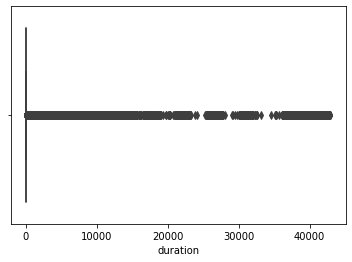

protocol_type


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


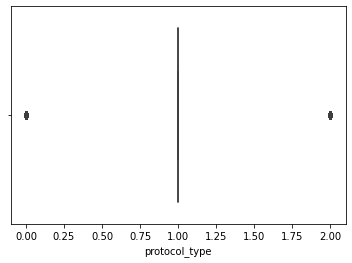

service


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


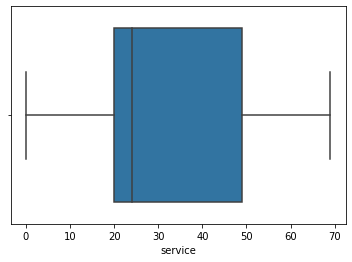

flag


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


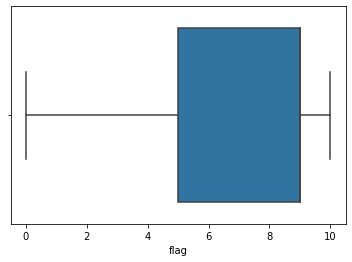

src_bytes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


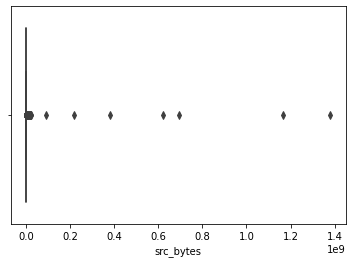

dst_bytes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


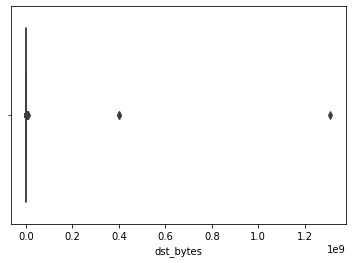

land


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


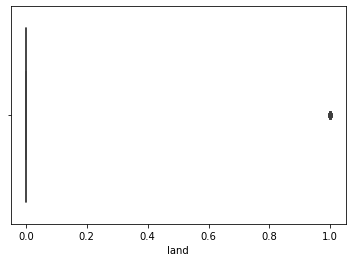

wrong_fragment


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


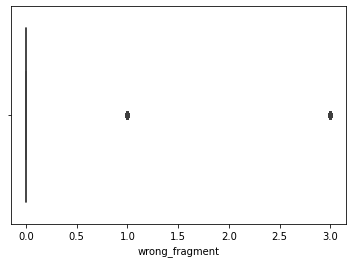

urgent


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


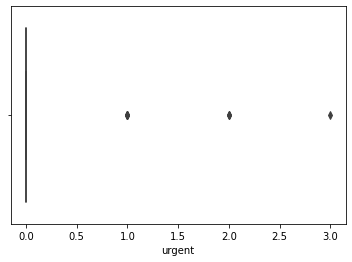

hot


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


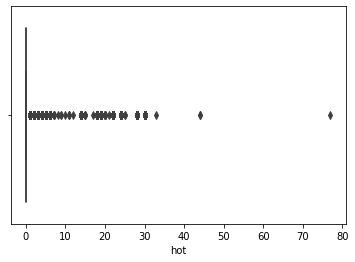

num_failed_logins


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


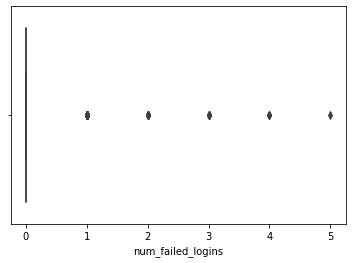

logged_in


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


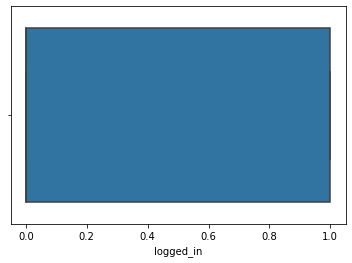

num_compromised


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


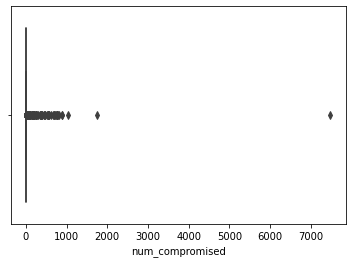

root_shell


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


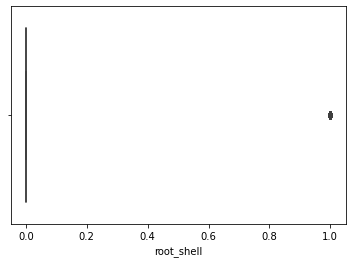

su_attempted


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


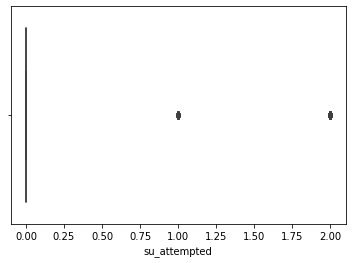

num_root


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


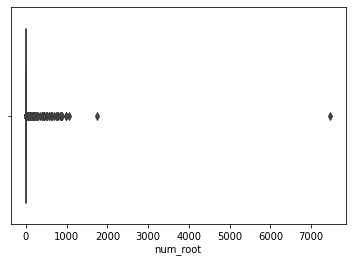

num_file_creations


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


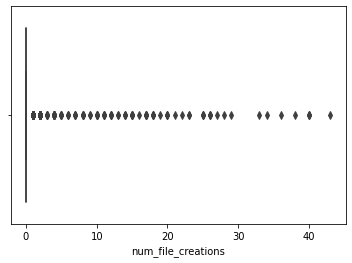

num_shells


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


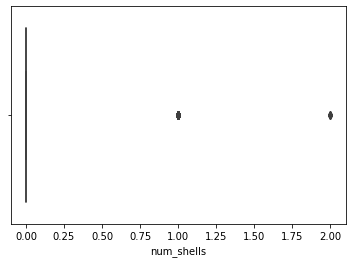

num_access_files


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


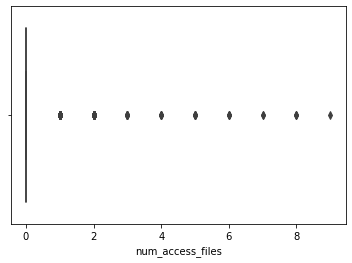

num_outbound_cmds


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


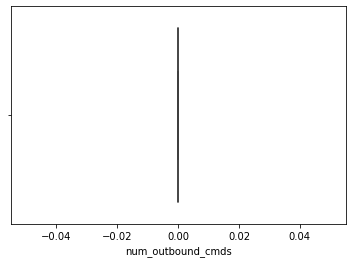

is_host_login


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


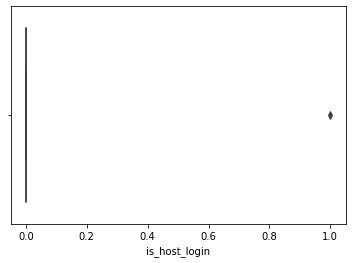

is_guest_login


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


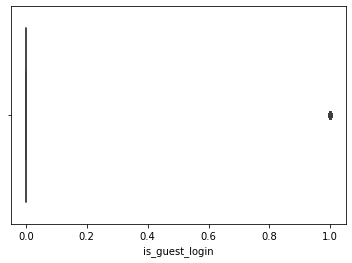

count


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


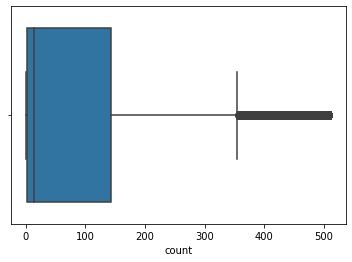

srv_count


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


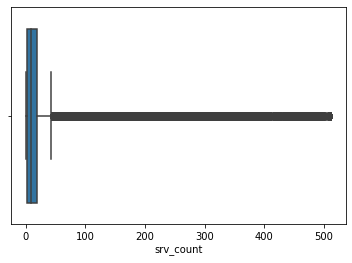

serror_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


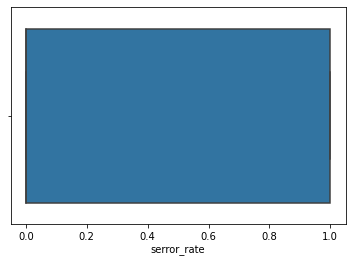

srv_serror_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


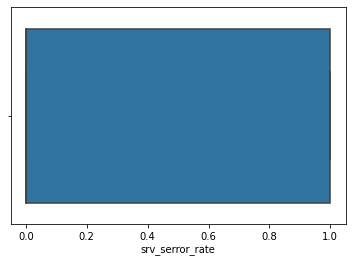

rerror_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


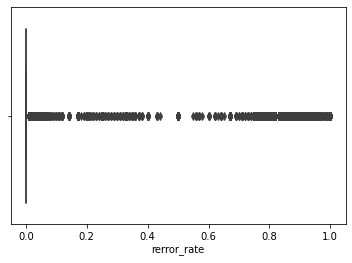

srv_rerror_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


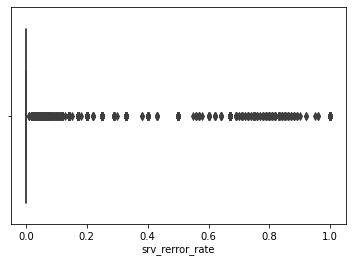

same_srv_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


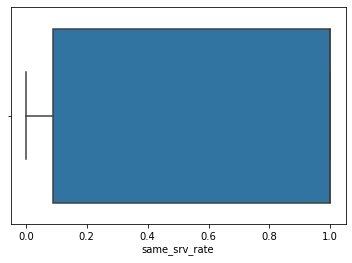

diff_srv_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


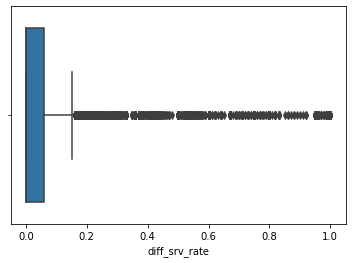

srv_diff_host_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


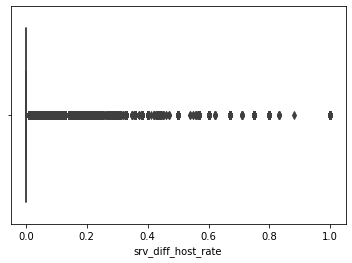

dst_host_count


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


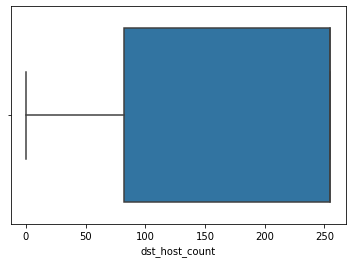

dst_host_srv_count


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


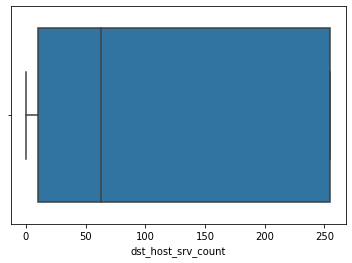

dst_host_same_srv_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


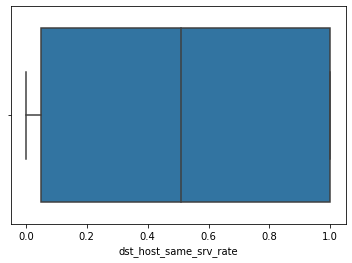

dst_host_diff_srv_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


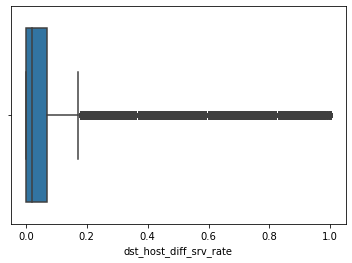

dst_host_same_src_port_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


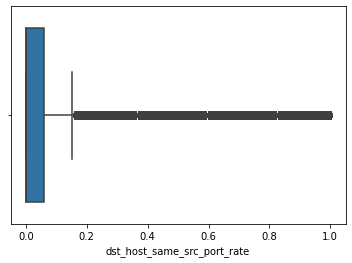

dst_host_srv_diff_host_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


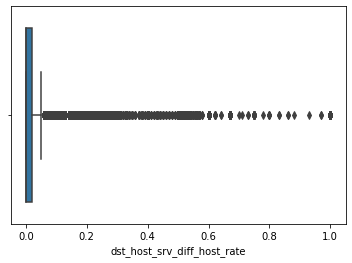

dst_host_serror_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


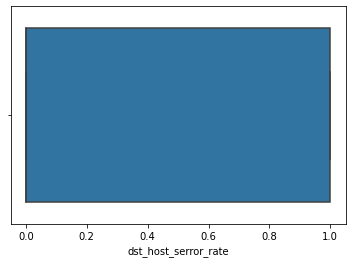

dst_host_srv_serror_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


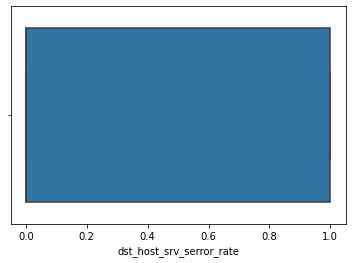

dst_host_rerror_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


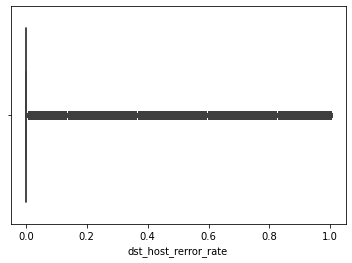

dst_host_srv_rerror_rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


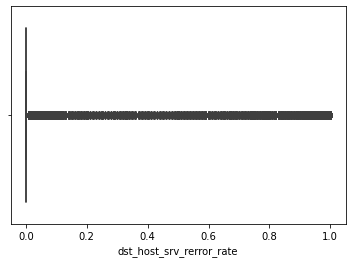

In [ ]:
import matplotlib.pyplot as plt
for i in columns[0:41]:
  print(i)
  sb.boxplot(data[i])
  plt.show()


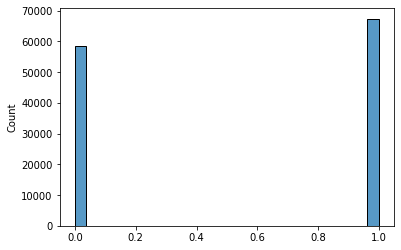

In [ ]:
sb.histplot(Y_original)

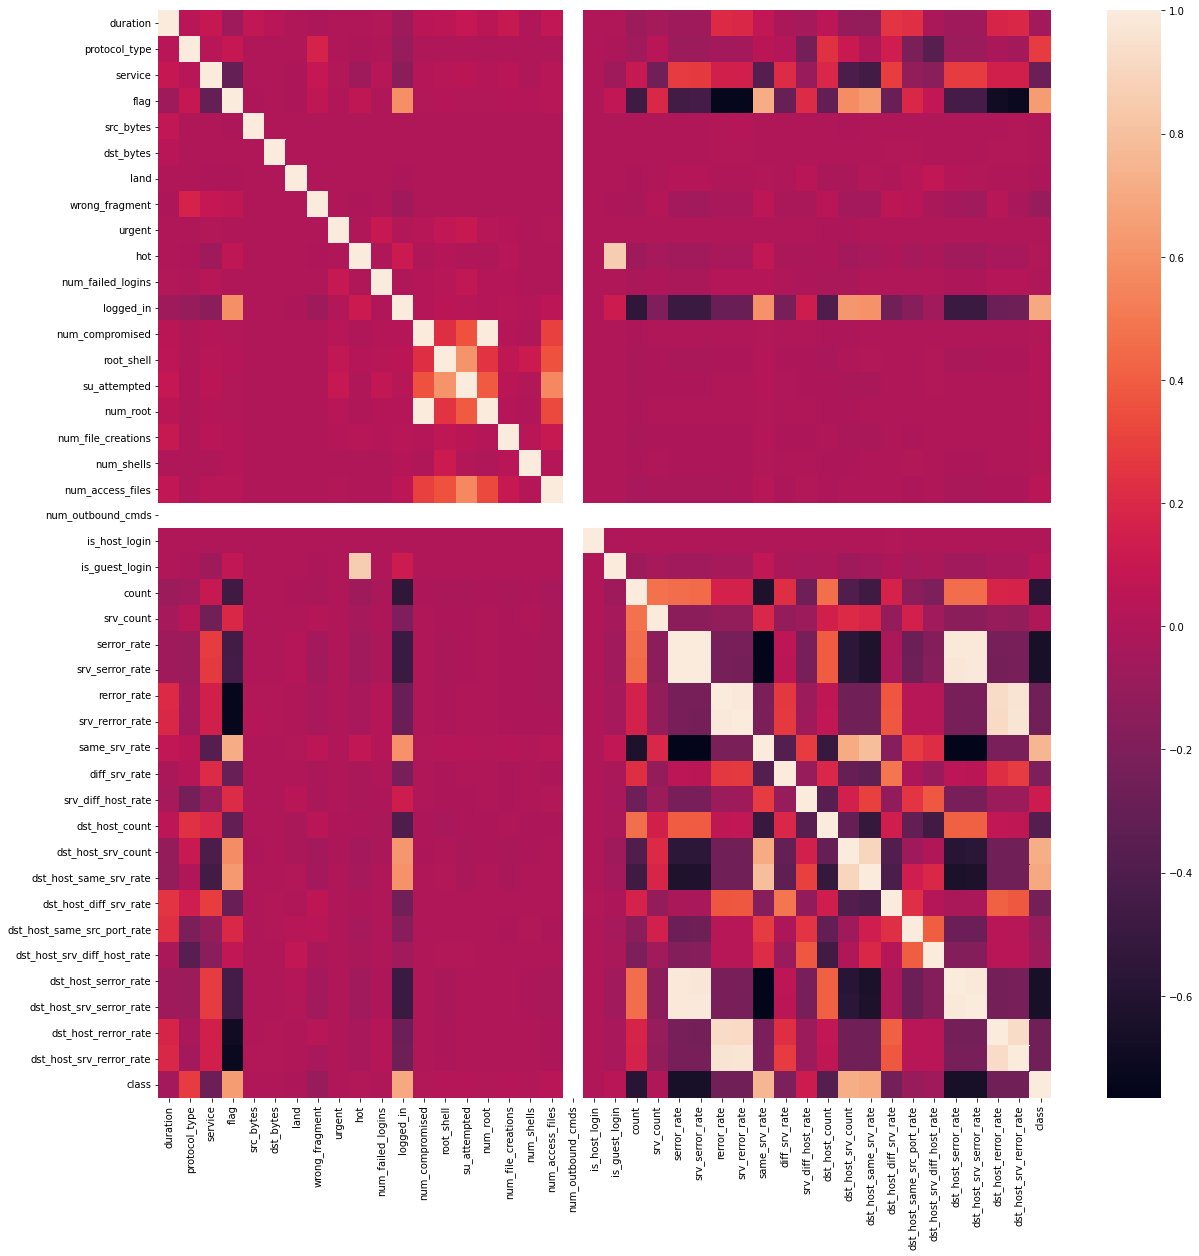

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sb.heatmap(data.corr(),ax=ax)

In [ ]:
data.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.000000,0.038241,0.092857,-0.063389,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,...,-0.109777,-0.116006,0.254195,0.228737,-0.026670,-0.064949,-0.064361,0.173815,0.199023,-0.048785
protocol_type,0.038241,1.000000,0.029993,0.093669,-0.000974,-0.000608,-0.001757,0.169534,-0.000965,-0.011857,...,0.103918,0.001701,0.131380,-0.209105,-0.356183,-0.079399,-0.077926,-0.015435,-0.046938,0.281357
service,0.092857,0.029993,1.000000,-0.304011,-0.001631,0.003596,-0.009952,0.084404,0.010980,-0.064067,...,-0.407702,-0.452702,0.284071,-0.111163,-0.156213,0.281632,0.277592,0.150666,0.148403,-0.276545
flag,-0.063389,0.093669,-0.304011,1.000000,-0.008114,-0.004096,-0.010373,0.067215,0.005811,0.068438,...,0.582695,0.630126,-0.283606,0.195689,0.073775,-0.443438,-0.443223,-0.683310,-0.718778,0.647071
src_bytes,0.070737,-0.000974,-0.001631,-0.008114,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,...,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.005921
dst_bytes,0.034878,-0.000608,0.003596,-0.004096,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,...,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.004118
land,-0.001553,-0.001757,-0.009952,-0.010373,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,...,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.007191
wrong_fragment,-0.009866,0.169534,0.084404,0.067215,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,...,-0.045241,-0.048734,0.059796,0.037177,-0.016252,-0.051917,-0.055918,0.028890,-0.033682,-0.095905
urgent,0.003830,-0.000965,0.010980,0.005811,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,...,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,0.002787
hot,0.000705,-0.011857,-0.064067,0.068438,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,...,-0.051865,-0.036294,-0.012293,-0.034536,-0.024715,-0.058223,-0.058215,-0.030555,-0.031670,0.013084


Feature Selection process:
How to carryout feature selection:
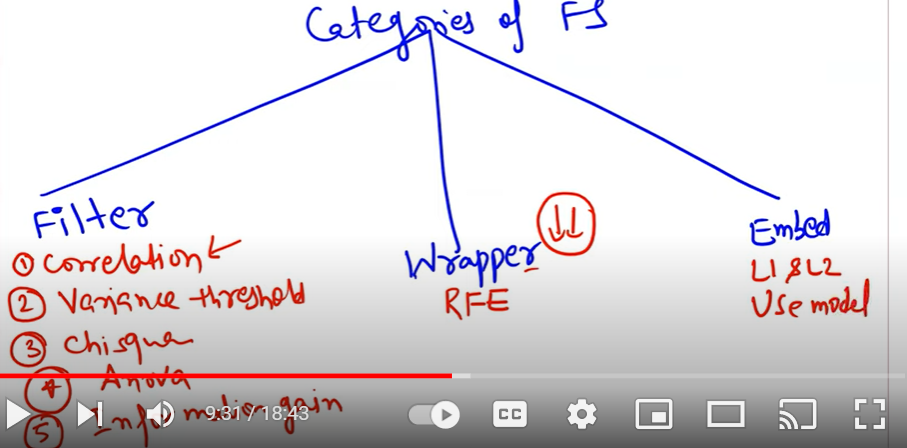

Feature Selector Wrapper Method:

Default forward

if Forward=False the backward wrapper works

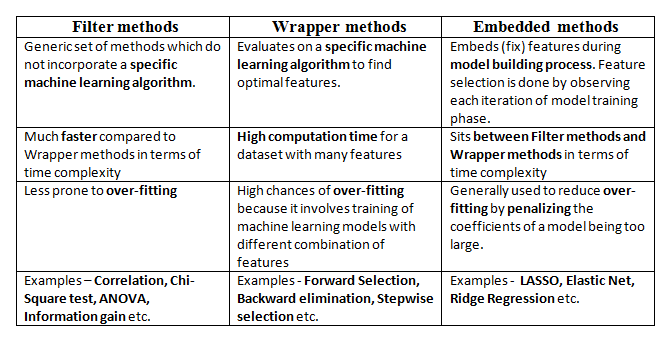

Using XG Boost for Feature Selection

In [ ]:

from xgboost import XGBClassifier as xgb
rf=xgb()
rf.fit(X_original,Y_original)


XGBClassifier()

In [ ]:
importances=rf.feature_importances_
importances_with_feature=pd.Series(importances,index=columns[:-1])
print(importances_with_feature)


duration                       0.014649
protocol_type                  0.078842
service                        0.014481
flag                           0.004522
src_bytes                      0.299805
dst_bytes                      0.121763
land                           0.000000
wrong_fragment                 0.012742
urgent                         0.000000
hot                            0.037854
num_failed_logins              0.000000
logged_in                      0.002796
num_compromised                0.015122
root_shell                     0.000000
su_attempted                   0.000000
num_root                       0.000000
num_file_creations             0.005980
num_shells                     0.000000
num_access_files               0.000000
num_outbound_cmds              0.000000
is_host_login                  0.000000
is_guest_login                 0.003332
count                          0.050161
srv_count                      0.019728
serror_rate                    0.000000


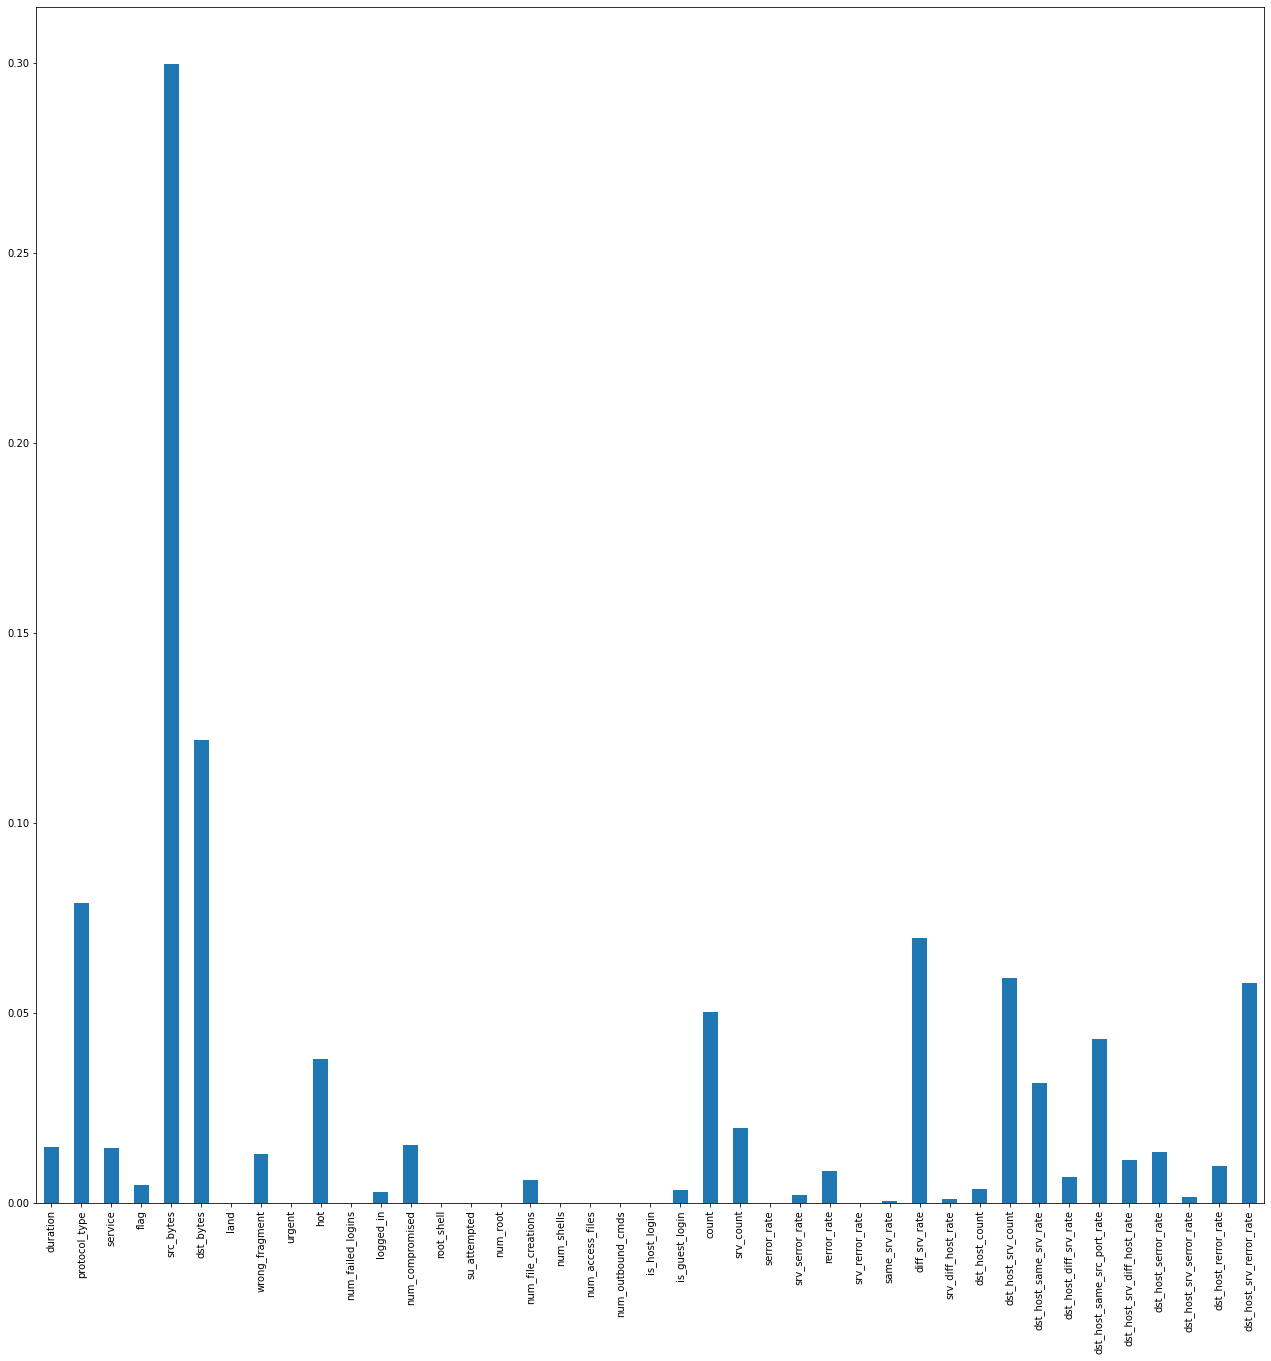

In [ ]:
fix,ax=plt.subplots(figsize=(22,22))
importances_with_feature.plot.bar(ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
y_true=rf.predict(X_original)
accuracy_score(y_true, Y_original)

0.9960229257295272

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=30)
# fit the model
model.fit(X_original,Y_original)
importance = model.coef_[0]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


duration  importance = 0.1043937477454787
protocol_type  importance = 0.7056349693101286
service  importance = 0.01693487718011833
flag  importance = -1.521413109694633
src_bytes  importance = -0.30996163911823915
dst_bytes  importance = -0.09125302190864418
land  importance = 0.07322022318513102
wrong_fragment  importance = -1.5144117944078974
urgent  importance = -0.017411789983300948
hot  importance = -1.8100928656147233
num_failed_logins  importance = -0.017822289977526457
logged_in  importance = 0.35264992628207215
num_compromised  importance = -0.2366177725957837
root_shell  importance = -0.04585346014067304
su_attempted  importance = 0.09308239527377819
num_root  importance = 0.2687467269110378
num_file_creations  importance = 0.4375221504074611
num_shells  importance = -0.018350484305939385
num_access_files  importance = 0.07455591350650949
num_outbound_cmds  importance = 0.0
is_host_login  importance = 0.024921563090544455
is_guest_login  importance = 1.9396503689192506
count 

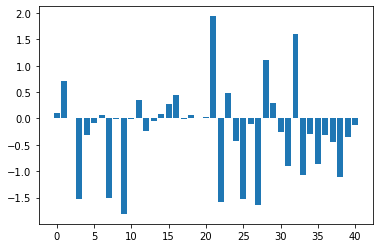

In [ ]:
# summarize feature importance
for i,v in enumerate(importance):
	print(columns[i]+"  importance = "+str(v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:

importance=pd.Series(importance)
importance

0     0.104394
1     0.705635
2     0.016935
3    -1.521413
4    -0.309962
5    -0.091253
6     0.073220
7    -1.514412
8    -0.017412
9    -1.810093
10   -0.017822
11    0.352650
12   -0.236618
13   -0.045853
14    0.093082
15    0.268747
16    0.437522
17   -0.018350
18    0.074556
19    0.000000
20    0.024922
21    1.939650
22   -1.586664
23    0.482692
24   -0.424375
25   -1.534881
26   -0.113078
27   -1.648108
28    1.118382
29    0.302817
30   -0.250677
31   -0.906676
32    1.594794
33   -1.069707
34   -0.302697
35   -0.858764
36   -0.320782
37   -0.441619
38   -1.117817
39   -0.346335
40   -0.115057
dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score
y_true=model.predict(X_original)
accuracy_score(y_true, Y_original)

0.9538230717937319

In [ ]:
from matplotlib import pyplot as plt
from sklearn import svm
features_names = columns[:-1]
svm = svm.SVC(kernel='linear',max_iter=300)
svm.fit(X_original, Y_original)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(kernel='linear', max_iter=300)

In [ ]:
result=pd.Series(svm.coef_[0])
result

0    -3.958451e-01
1     2.750115e-01
2    -3.714423e-01
3     5.033877e-01
4    -1.454888e-01
5    -5.687513e-01
6     2.775558e-17
7    -9.499637e-01
8     1.621359e-14
9    -1.127785e-01
10    3.885781e-15
11    1.548359e-01
12   -1.026388e+00
13   -5.542073e-02
14    3.301360e-02
15    4.401544e-02
16   -3.836139e-01
17   -1.757360e-01
18   -4.653161e-02
19    0.000000e+00
20   -2.784231e-16
21    5.378312e-03
22   -2.814422e-01
23    2.450617e-01
24   -1.915499e-02
25   -7.728363e-01
26    1.320768e-01
27   -7.359439e-02
28   -2.111864e-01
29   -1.368668e-01
30   -1.363546e-01
31   -5.980501e-01
32    2.817395e-01
33    3.360282e-01
34   -3.760140e-02
35    1.819326e-01
36   -5.737423e-02
37   -2.246545e-01
38   -8.901467e-01
39   -7.111981e-01
40   -1.194106e-01
dtype: float64

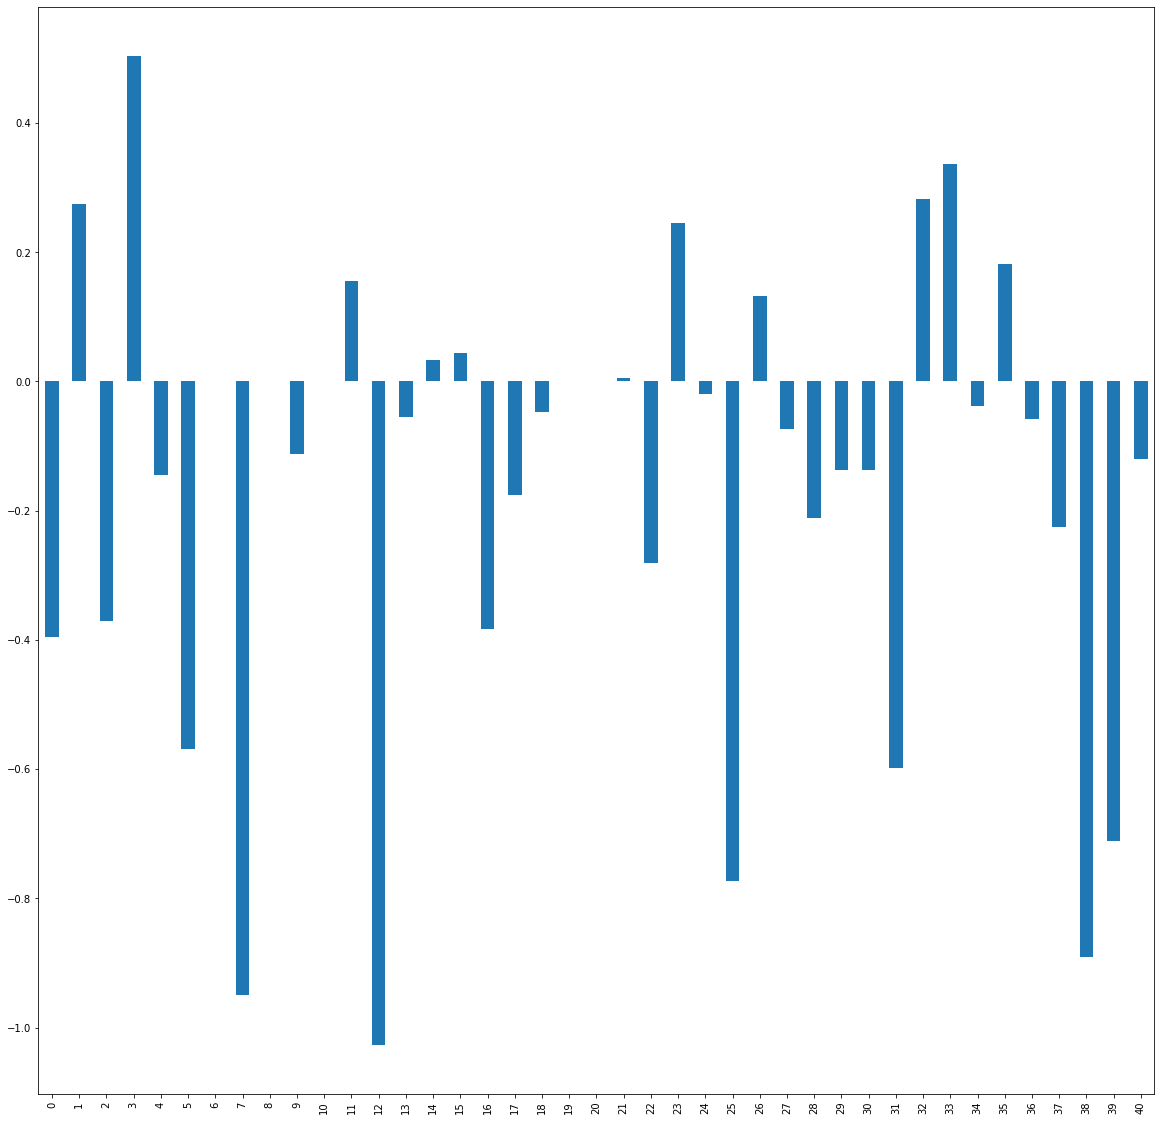

In [ ]:
fig,ax2=plt.subplots(figsize=(20,20))
result.plot.bar(ax=ax2)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
y_true=svm.predict(X_original)
accuracy_score(y_true, Y_original)

0.9066935509478297

Since the Accuracy of the XGBoost model is good we shall choose features based on XGBOOST model.

Removing feature numbers:

6=land

8	urgent

10	num_failed_logins

13	root_shell	
14	su_attempted	
15	num_root

7	num_shells	
18	num_access_files	
19	num_outbound_cmds	
20	is_host_login	
24	serror_rate

27	srv_rerror_rate


Final Removal of the above features and standardising the Independent variables

In [ ]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
1,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
2,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,1,49,1,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125968,8,2,49,9,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125969,0,1,54,9,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125970,0,1,30,5,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [ ]:
X = data.drop(['land','urgent','num_failed_logins','root_shell','su_attempted','num_root' ,'num_shells',
'num_access_files','num_outbound_cmds','is_host_login','serror_rate','srv_rerror_rate'],1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
len(X.columns)

30

In [ ]:
X_original=Standardization(X)

In [ ]:
X_original[:3]

array([[-0.11024967,  2.21930219,  0.78142044,  0.75111595, -0.0077374 ,
        -0.00491866, -0.08948678, -0.09507605, -0.80926713, -0.01166369,
        -0.02618013, -0.09753133, -0.62098696, -0.36811175, -0.63193254,
        -0.37436393, -1.32141976,  0.4821961 , -0.3745614 ,  0.73433738,
        -1.03569278, -1.16103461,  2.73683944,  2.36772855, -0.28910464,
        -0.63953548, -0.62487425, -0.38763494, -0.37638873,  0.93307583],
       [-0.11024967, -0.12470666,  1.08729745, -0.7362274 , -0.00776227,
        -0.00491866, -0.08948678, -0.09507605, -0.80926713, -0.01166369,
        -0.02618013, -0.09753133,  0.33964148, -0.29927517,  1.60509487,
        -0.37436393, -1.38966023,  0.0385264 , -0.3745614 ,  0.73433738,
        -0.80986218, -0.9382918 , -0.17441894, -0.4801944 , -0.28910464,
         1.60875023,  1.61894633, -0.38763494, -0.37638873, -1.07172425],
       [-0.11024967, -0.12470666, -0.44208761,  0.75111595, -0.00772275,
        -0.00289119, -0.08948678, -0.09507605,  1

In [ ]:
X_original.shape

(125972, 30)

Y_original is the true Y to be predicted

Clustering and Relabelling Process using KMeans

In [ ]:
from sklearn.cluster import KMeans

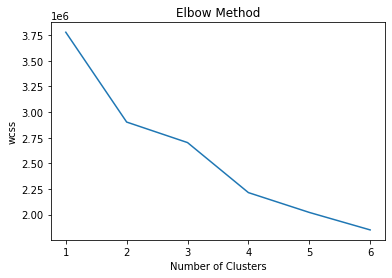

In [ ]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X_original)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_original)

In [ ]:
Y_new_orig=kmeans.predict(X_original)

In [ ]:
kmeans.labels_

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

In [ ]:
count_0,count_1,count_2,count_3=0,0,0,0
for i in Y:
  if i==0:
    count_0+=1
  else:
    count_1+=1
print("When 2 classes")
print("Count of class 0 (anomaly) is "+str(count_0))
print("Count of class 1 (normal) is "+str(count_1))

count_0,count_1,count_2,count_3=0,0,0,0

cluster_0=pd.DataFrame(columns=columns)
cluster_1=pd.DataFrame(columns=columns)
cluster_2=pd.DataFrame(columns=columns)
cluster_3=pd.DataFrame(columns=columns)

for i in range(len(Y_new_orig)):
  if Y_new_orig[i]==0:
    cluster_0.loc[len(cluster_0.index)]=X.iloc[i]
    count_0+=1
  elif Y_new_orig[i] == 1:
    cluster_1.loc[len(cluster_1.index)]=X.iloc[i]
    count_1+=1
  elif Y_new_orig[i]==2:
    cluster_2.loc[len(cluster_2.index)]=X.iloc[i]
    count_2+=1
  else:
    cluster_3.loc[len(cluster_3.index)]=X.iloc[i]
    count_3+=1
print("\nWhen 4 clusters:")
print("Count of class 0 is "+str(count_0))
print("Count of class 1 is "+str(count_1))
print("Count of class 2 is "+str(count_2))
print("Count of class 3 is "+str(count_3))

When 2 classes
Count of class 0 (anomaly) is 58630
Count of class 1 (normal) is 67342

When 4 clusters:
Count of class 0 is 34755
Count of class 1 is 74699
Count of class 2 is 15327
Count of class 3 is 1191


In [ ]:
print("In cluster 0:")
print("Count of anomaly(0) is "+str(cluster_0['class'].value_counts()[0]))
print("Count of normal(1) is "+str(cluster_0['class'].value_counts()[1]))
print("\nIn cluster 1:")
print("Count of anomaly is "+str(cluster_1['class'].value_counts()[0]))
print("Count of normal is "+str(cluster_1['class'].value_counts()[1]))
print("\nIn cluster 2:")
print("Count of anomaly is "+str(cluster_2['class'].value_counts()[0]))
print("Count of normal is "+str(cluster_2['class'].value_counts()[1]))
print("\nIn cluster 3:")
print("Count of anomaly is "+str(cluster_3['class'].value_counts()[0]))
print("Count of normal is "+str(cluster_3['class'].value_counts()[1]))

In cluster 0:
Count of anomaly(0) is 34718
Count of normal(1) is 37

In cluster 1:
Count of anomaly is 11038
Count of normal is 63661

In cluster 2:
Count of anomaly is 12560
Count of normal is 2767

In cluster 3:
Count of anomaly is 314
Count of normal is 877


In [ ]:
cluster_0['label']=0
cluster_1['label']=1
cluster_2['label']=2
cluster_3['label']=3

normal=pd.DataFrame(columns=cluster_0.columns)
anomaly=pd.DataFrame(columns=cluster_0.columns)

anomaly=cluster_0[cluster_0['class']=='anomaly']
anomaly=anomaly.append(cluster_1[cluster_1['class']=='anomaly'],ignore_index=True)
anomaly=anomaly.append(cluster_2[cluster_2['class']=='anomaly'],ignore_index=True)
anomaly=anomaly.append(cluster_3[cluster_3['class']=='anomaly'],ignore_index=True)

normal=cluster_0[cluster_0['class']=='normal']
normal=normal.append(cluster_1[cluster_1['class']=='normal'],ignore_index=True)
normal=normal.append(cluster_2[cluster_2['class']=='normal'],ignore_index=True)
normal=normal.append(cluster_3[cluster_3['class']=='normal'],ignore_index=True)

print("count in normal: "+str(normal.shape[0]))
print("count in anomaly: "+str(anomaly.shape[0]))

In [ ]:
max_val=[cluster_0.loc[cluster_0['class']=='anomaly'].protocol_type.mode()[0],
        cluster_0.loc[cluster_0['class']=='anomaly'].service.mode()[0],
        cluster_0.loc[cluster_0['class']=='anomaly'].flag.mode()[0],
        cluster_0.loc[cluster_0['class']=='anomaly'].src_bytes.mode()[0],
        cluster_0.loc[cluster_0['class']=='anomaly'].dst_bytes.mode()[0],
        
        cluster_0.loc[cluster_0['class']=='normal'].protocol_type.mode()[0],
        cluster_0.loc[cluster_0['class']=='normal'].service.mode()[0],
        cluster_0.loc[cluster_0['class']=='normal'].flag.mode()[0],
        cluster_0.loc[cluster_0['class']=='normal'].src_bytes.mode()[0],
        cluster_0.loc[cluster_0['class']=='normal'].dst_bytes.mode()[0]]

print("In cluster 0\n\nthe anomaly data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}".format(max_val[0],max_val[1],max_val[2],max_val[3],max_val[4]))
print("\nthe normal data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}".format(max_val[5],max_val[6],max_val[7],max_val[8],max_val[9]))

In cluster 0, the anomaly data majorly used udp protocol, service type 69.0 & flag 10.0
In cluster 0, the normal data majorly used tcp protocol, service type 60.0 & flag 9.0


In [ ]:
max_val=[cluster_1.loc[cluster_1['class']=='anomaly'].protocol_type.mode()[0],
        cluster_1.loc[cluster_1['class']=='anomaly'].service.mode()[0],
        cluster_1.loc[cluster_1['class']=='anomaly'].flag.mode()[0],
         cluster_1.loc[cluster_1['class']=='anomaly'].src_bytes.mode()[0],
        cluster_1.loc[cluster_1['class']=='anomaly'].dst_bytes.mode()[0],
         
        cluster_1.loc[cluster_1['class']=='normal'].protocol_type.mode()[0],
        cluster_1.loc[cluster_1['class']=='normal'].service.mode()[0],
        cluster_1.loc[cluster_1['class']=='normal'].flag.mode()[0],
         cluster_1.loc[cluster_1['class']=='anomaly'].src_bytes.mode()[0],
        cluster_1.loc[cluster_1['class']=='anomaly'].dst_bytes.mode()[0]]

print("In cluster 1\n\nthe anomaly data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}".format(max_val[0],max_val[1],max_val[2],max_val[3],max_val[4]))
print("\nthe normal data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}".format(max_val[5],max_val[6],max_val[7],max_val[8],max_val[9]))

In cluster 1, the anomaly data majorly used udp protocol, service type 66.0 & flag 10.0
In cluster 1, the normal data majorly used udp protocol, service type 65.0 & flag 10.0


In [ ]:
max_val=[cluster_2.loc[cluster_2['class']=='anomaly'].protocol_type.mode()[0],
        cluster_2.loc[cluster_2['class']=='anomaly'].service.mode()[0],
        cluster_2.loc[cluster_2['class']=='anomaly'].flag.mode()[0],
         cluster_2.loc[cluster_2['class']=='anomaly'].src_bytes.mode()[0],
        cluster_2.loc[cluster_2['class']=='anomaly'].dst_bytes.mode()[0],
         
        cluster_2.loc[cluster_2['class']=='normal'].protocol_type.mode()[0],
        cluster_2.loc[cluster_2['class']=='normal'].service.mode()[0],
        cluster_2.loc[cluster_2['class']=='normal'].flag.mode()[0],
         cluster_2.loc[cluster_2['class']=='anomaly'].src_bytes.mode()[0],
        cluster_2.loc[cluster_2['class']=='anomaly'].dst_bytes.mode()[0]]

print("In cluster 2\n\nthe anomaly data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}".format(max_val[0],max_val[1],max_val[2],max_val[3],max_val[4]))
print("\nthe normal data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}".format(max_val[5],max_val[6],max_val[7],max_val[8],max_val[9]))

In cluster 2, the anomaly data majorly used udp protocol, service type 69.0 & flag 9.0
In cluster 2, the normal data majorly used tcp protocol, service type 63.0 & flag 9.0


In [ ]:
max_val=[cluster_3.loc[cluster_3['class']=='anomaly'].protocol_type.mode()[0],
        cluster_3.loc[cluster_3['class']=='anomaly'].service.mode()[0],
        cluster_3.loc[cluster_3['class']=='anomaly'].flag.mode()[0],
         cluster_3.loc[cluster_3['class']=='anomaly'].src_bytes.mode()[0],
        cluster_3.loc[cluster_3['class']=='anomaly'].dst_bytes.mode()[0],
         
        cluster_3.loc[cluster_3['class']=='normal'].protocol_type.mode()[0],
        cluster_3.loc[cluster_3['class']=='normal'].service.mode()[0],
        cluster_3.loc[cluster_3['class']=='normal'].flag.mode()[0],
         cluster_3.loc[cluster_3['class']=='anomaly'].src_bytes.mode()[0],
        cluster_3.loc[cluster_3['class']=='anomaly'].dst_bytes.mode()[0]]

print("In cluster 3\n\nthe anomaly data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}".format(max_val[0],max_val[1],max_val[2],max_val[3],max_val[4]))
print("\nthe normal data majorly used {} protocol\nservice type: {}\nflag: {}\nsrc_bytes: {}\ndst_bytes: {}".format(max_val[5],max_val[6],max_val[7],max_val[8],max_val[9]))

In cluster 3, the anomaly data majorly used tcp protocol, service type 60.0 & flag 9.0
In cluster 3, the normal data majorly used tcp protocol, service type 60.0 & flag 9.0


Indirectly upon correlating with the original data class 1 of new data belongs to normal traffic with slight amount of anamoly as well

In [ ]:
Y_new_orig.shape

(125972,)

In [ ]:
centroids=kmeans.cluster_centers_

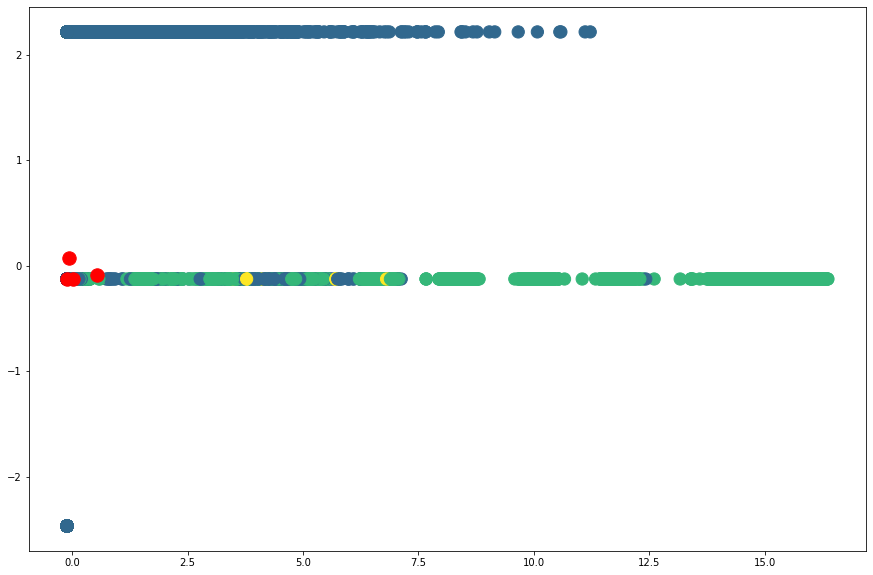

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.scatter(X_original[:, 0],X_original[:, 1], c=Y_new_orig, s=150, cmap='viridis') # plotting x values against 4 clusters
plt.scatter(centroids[:,0] , centroids[:,1] , s = 180, color = 'r')
plt.show()

XGBOOST Model after Kmeans clustering 

In [ ]:
xgb_multi=xgb(n_estimators=200,max_depth=5)
xgb_multi.fit(X_original,Y_new_orig)

XGBClassifier(max_depth=5, n_estimators=200, objective='multi:softprob')

In [ ]:
from sklearn.metrics import accuracy_score
y_true_xgb=xgb_multi.predict(X_original)
accuracy_score( Y_new_orig, y_true_xgb)

1.0

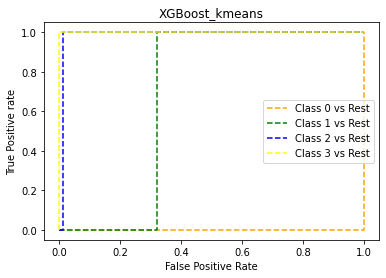

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr = {}
tpr = {}
thresh ={}
for i in range(4):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_new_orig, y_true_xgb, pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('XGBoost_kmeans')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_new_orig, y_true_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34755
           1       1.00      1.00      1.00     74699
           2       1.00      1.00      1.00     15327
           3       1.00      1.00      1.00      1191

    accuracy                           1.00    125972
   macro avg       1.00      1.00      1.00    125972
weighted avg       1.00      1.00      1.00    125972



In [ ]:
import pickle
pickle.dump(kmeans, open("/content/kmeans_cluster.pkl", "wb"))

In [ ]:
import pickle
pickle.dump(xgb_multi, open("/content/xgboost_kmeans.pkl", "wb"))

Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_multi = LogisticRegression(max_iter=100)
# fit the model
LR_multi.fit(X_original,Y_new_orig)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_true_log=LR_multi.predict(X_original)
accuracy_score(y_true, y_true_log)

0.8573968818467596

In [ ]:
y_true_log

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

In [ ]:
print(classification_report(y_true,y_true_log))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.72      0.84     48142
           1       0.98      0.94      0.96     77830
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.86    125972
   macro avg       0.49      0.42      0.45    125972
weighted avg       0.99      0.86      0.91    125972



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


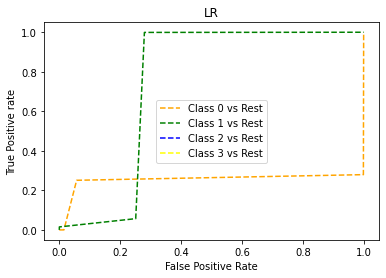

In [ ]:
fpr = {}
tpr = {}
thresh ={}
for i in range(4):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_true_log, pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [ ]:
#auc=roc_auc_score(y_true_log,Y_new_orig)
#print(auc)

In [ ]:
pickle.dump(LR_multi, open("/content/LR_kmeans.pkl", "wb"))

SVM Classifier

In [ ]:
from matplotlib import pyplot as plt
from sklearn import svm
svm_multi = svm.SVC(kernel='linear',max_iter=300)
svm_multi.fit(X_original, Y_new_orig)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(kernel='linear', max_iter=300)

In [ ]:
from sklearn.metrics import accuracy_score
y_true_svm=svm_multi.predict(X_original)
accuracy_score(y_true, y_true_svm)

0.8573254373987871

In [ ]:
print(classification_report(y_true,y_true_svm))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84     48142
           1       0.98      0.94      0.96     77830
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.86    125972
   macro avg       0.49      0.42      0.45    125972
weighted avg       0.99      0.86      0.91    125972



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


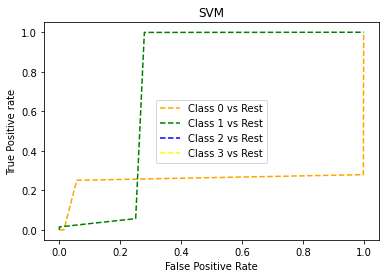

In [ ]:
fpr = {}
tpr = {}
thresh ={}
for i in range(4):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true,y_true_svm, pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [ ]:
pickle.dump(svm_multi, open("/content/svm_kmeans.pkl", "wb"))